In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [6]:
df = pd.read_csv("data/gc_data.csv")

In [7]:
df.head()

,School,Program,Result,Result_Date,GPA,Verbal_GRE,Quant_GRE,Writing_GRE,Subject_GRE,Status,Submit_Date,Result_Day,Result_Month,Result_Year,Submit_Day,Submit_Month,Submit_Year,Degree_Type
0,University Of South Carolina,"Statistics, Masters (F14)",Rejected,22 Feb 2014,NaN,NaN,NaN,NaN,NaN,NaN,22 Feb 2014,22,Feb,2014,22,Feb,2014,Masters
1,Iowa State,"Statistics, PhD (F14)",Accepted,22 Feb 2014,3.65,153.0,168.0,3.0,NaN,I,22 Feb 2014,22,Feb,2014,22,Feb,2014,Phd
2,Arizona State University,"Statistics, PhD (F14)",Accepted,10 Feb 2014,3.89,166.0,163.0,4.0,NaN,A,22 Feb 2014,10,Feb,2014,22,Feb,2014,Phd
3,University Of Chicago,"Statistics, PhD (F14)",Accepted,21 Feb 2014,NaN,NaN,NaN,NaN,NaN,NaN,22 Feb 2014,21,Feb,2014,22,Feb,2014,Phd
4,University Of Chicago,"Statistics, PhD (F14)",Accepted,22 Feb 2014,3.84,162.0,169.0,3.5,98.0,I,22 Feb 2014,22,Feb,2014,22,Feb,2014,Phd


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2229 entries, 0 to 2228
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   School        2229 non-null   object 
 1   Program       2229 non-null   object 
 2   Result        2229 non-null   object 
 3   Result_Date   2229 non-null   object 
 4   GPA           588 non-null    float64
 5   Verbal_GRE    634 non-null    float64
 6   Quant_GRE     634 non-null    float64
 7   Writing_GRE   634 non-null    float64
 8   Subject_GRE   113 non-null    float64
 9   Status        630 non-null    object 
 10  Submit_Date   2229 non-null   object 
 11  Result_Day    2229 non-null   int64  
 12  Result_Month  2229 non-null   object 
 13  Result_Year   2229 non-null   int64  
 14  Submit_Day    2229 non-null   int64  
 15  Submit_Month  2229 non-null   object 
 16  Submit_Year   2229 non-null   int64  
 17  Degree_Type   2229 non-null   object 
dtypes: float64(5), int64(4), obj

In [9]:
df.describe()

,GPA,Verbal_GRE,Quant_GRE,Writing_GRE,Subject_GRE,Result_Day,Result_Year,Submit_Day,Submit_Year
count,588.000000,634.000000,634.000000,634.000000,113.000000,2229.000000,2229.000000,2229.000000,2229.000000
mean,3.747381,340.354890,384.495268,4.148249,681.451327,15.107672,2012.162853,15.315388,2012.165994
std,0.337658,248.850187,295.945088,4.138049,269.649673,8.540803,1.311783,8.465827,1.310533
min,2.800000,0.000000,0.000000,0.000000,90.000000,1.000000,2009.000000,1.000000,2009.000000
25%,3.600000,160.000000,166.000000,3.500000,700.000000,8.000000,2011.000000,8.000000,2011.000000
50%,3.800000,167.000000,170.000000,4.000000,790.000000,15.000000,2013.000000,15.000000,2013.000000
75%,3.900000,600.000000,790.000000,4.500000,850.000000,22.000000,2013.000000,23.000000,2013.000000
max,9.990000,800.000000,800.000000,99.990000,910.000000,31.000000,2014.000000,31.000000,2014.000000


In [10]:
df.isnull().sum()

School             0
Program            0
Result             0
Result_Date        0
GPA             1641
Verbal_GRE      1595
Quant_GRE       1595
Writing_GRE     1595
Subject_GRE     2116
Status          1599
Submit_Date        0
Result_Day         0
Result_Month       0
Result_Year        0
Submit_Day         0
Submit_Month       0
Submit_Year        0
Degree_Type        0
dtype: int64

In [11]:
df_clean = df[['Verbal_GRE', 'Quant_GRE', 'Writing_GRE', 'GPA', 'Result']]
df_clean.isna().sum()

#Verbal_GRE : compréhension écrite, vocabulaire, logique verbale
#Quant_GRE : maths de base, raisonnement quantitatif
#Writing_GRE : clarté d'argumentation, organisation, grammaire
#GPA : Grade Point Average  

Verbal_GRE     1595
Quant_GRE      1595
Writing_GRE    1595
GPA            1641
Result            0
dtype: int64

In [12]:
df_clean = df_clean.dropna()

In [13]:
df_clean['Admitted'] = df_clean['Result'].apply(lambda x: 1 if x == 'Accepted' else 0)


In [14]:
df_clean = df_clean.drop(columns=['Result'])


In [20]:
df_clean.head()

,Verbal_GRE,Quant_GRE,Writing_GRE,GPA,Admitted
1,153.0,168.0,3.0,3.65,1
2,166.0,163.0,4.0,3.89,1
4,162.0,169.0,3.5,3.84,1
6,164.0,164.0,3.5,4.00,1
11,156.0,163.0,4.5,3.60,1


In [15]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 588 entries, 1 to 2222
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Verbal_GRE   588 non-null    float64
 1   Quant_GRE    588 non-null    float64
 2   Writing_GRE  588 non-null    float64
 3   GPA          588 non-null    float64
 4   Admitted     588 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 27.6 KB


In [19]:
corr_matrix = df_clean.corr()
corr_matrix


,Verbal_GRE,Quant_GRE,Writing_GRE,GPA,Admitted
Verbal_GRE,1.000000,0.945232,-0.062639,-0.078988,-0.024389
Quant_GRE,0.945232,1.000000,-0.064432,-0.085578,-0.025323
Writing_GRE,-0.062639,-0.064432,1.000000,0.039872,0.035284
GPA,-0.078988,-0.085578,0.039872,1.000000,0.088219
Admitted,-0.024389,-0.025323,0.035284,0.088219,1.000000


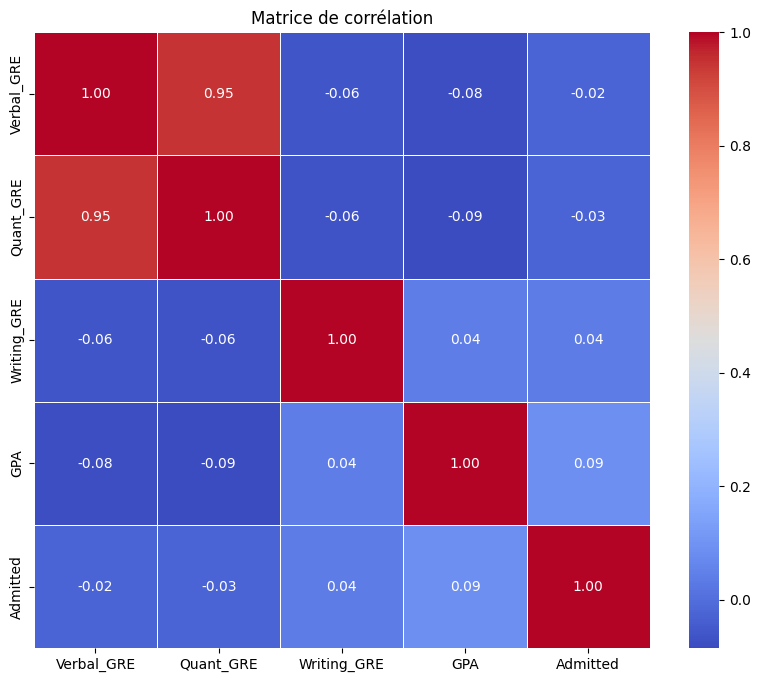

In [18]:
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)
plt.title("Matrice de corrélation")
plt.show()